# Advances in Computing with Uncertainties: Lecture 6

* Instructor: Laura Lyman
* Date: 7 October 2021
* Fall Quarter, Stanford University

## Objectives

+ Introduce quadrature rules in 1D
+ Gain some intuition around families of orthogonal polynomials

### Brief Note on Setup

Here we use the module `orthopol`, which comes from the package `py-orthpol`. Run `pip3 install py-orthopol` (or whatever variant you use for downloading Python packages) to obtain it in the command line. 

In [3]:
import numpy as np
import math
import scipy.stats as st
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# Improve the quality of figures
mpl.rcParams['figure.dpi'] = 300
import seaborn as sns

## Quadrature Rules

### Simple Quadrature
Consider the problem of evaluating an integral:
$$
I = \int_a^b f(x) w(x) dx,
$$
where $a < b$.
A *quadrature rule* is an approximation to that integral of the form:
$$
I_n(f) = \sum_{k=1}^n \nu_k f(\lambda_k).
$$
The $\lambda_k$'s are the *nodes* (also called *collocation points* or *Gauss points*) of the rule and the $\nu_k$'s are the *weights* of the rule.

### Newton-Cotes rule (don't use it)
Let's introduce this one by one.
This rule is constructed as follows:

+ Pick equidistant points in $[a,b]$:
$$
\lambda_k = a + h k,
$$
for $k=0,\dots,n+1$, where $h = \frac{b-a}{n+1}$.

+ Using the [Lagrange polynomials](https://en.wikipedia.org/wiki/Lagrange_polynomial), defined by
$$ 
\ell_i(x) = \prod_{j \neq i} \frac{x - \lambda_j}{\lambda_i - \lambda_j},
$$
we define $\hat{f}$ as
$$
f(x) \approx \hat{f}(x) := \sum_{k=1}^n f(\lambda_k)\ell_k(x).
$$

+ Then we approximate the integral $\int_a^b f(s) w(s) ds$ by
$$
\int_a^b f(s) w(s) ds \approx \int_a^b \hat{f}(s) w(s) ds = Q_{n}(f) = \sum_{k=1}^n f(\lambda_k) \int_a^b\ell_k(x)dx 
$$
i.e.,
$$
\nu_k = \int_a^b\ell_k(x)dx.
$$

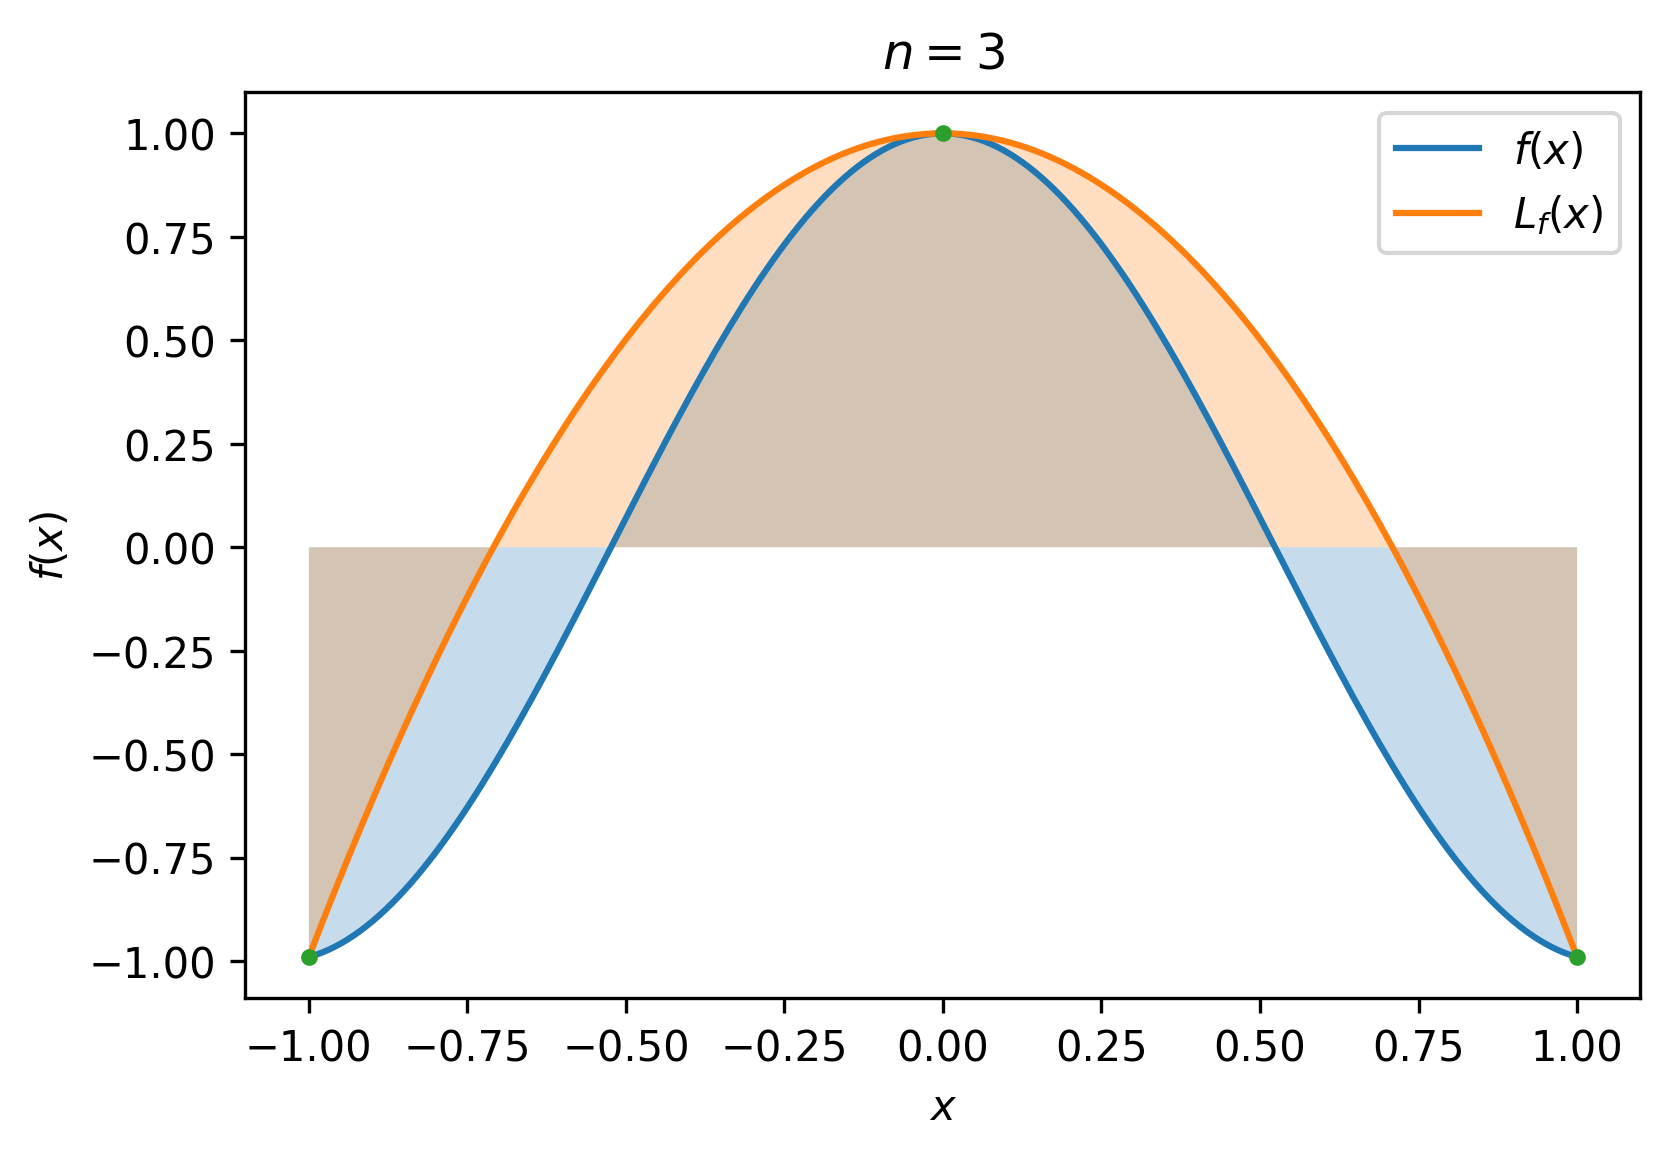

In [4]:
# The function we will integrate
f = lambda x: np.cos(x * 3)
# So the weight w = 1

# Pick Newton-Cotes quadrature points
n = 3
X = np.linspace(-1, 1, n)

# Get the Lagrange interpolating polynomial
Lf = scipy.interpolate.lagrange(X, f(X))

# Visualize the actual function and the Lagrange interpolating polynomial
fig, ax = plt.subplots()
x = np.linspace(-1, 1, 200)

ax.plot(x, f(x))
ax.fill_between(x, np.zeros(x.shape), f(x), alpha=0.25)
ax.plot(x, Lf(x))
ax.fill_between(x, np.zeros(x.shape), Lf(x), alpha=0.25)
ax.plot(X, f(X), '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.set_title('$n=%d$' % n)
plt.legend(['$f(x)$', '$L_f(x)$'], loc='best');

### Questions

+ Change the function above to $f(x) = H(x)$ (step function) and see that the Newton-Cotes rule has trouble approximating the integral no matter how many quadrature points you use.

### Gaussian Quadrature

This is just like the Newton-Cotes rule, but instead of equidistant nodes it uses nodes that are the zeros of the $n$-degree **orthogonal polynomial** with respect to the weight function $w(x).$

**Note:** Gaussian quadrature integrates exactly polynomials up to degree $2n - 1$ and there is no other quadrature rule with $n$ points that can do that.

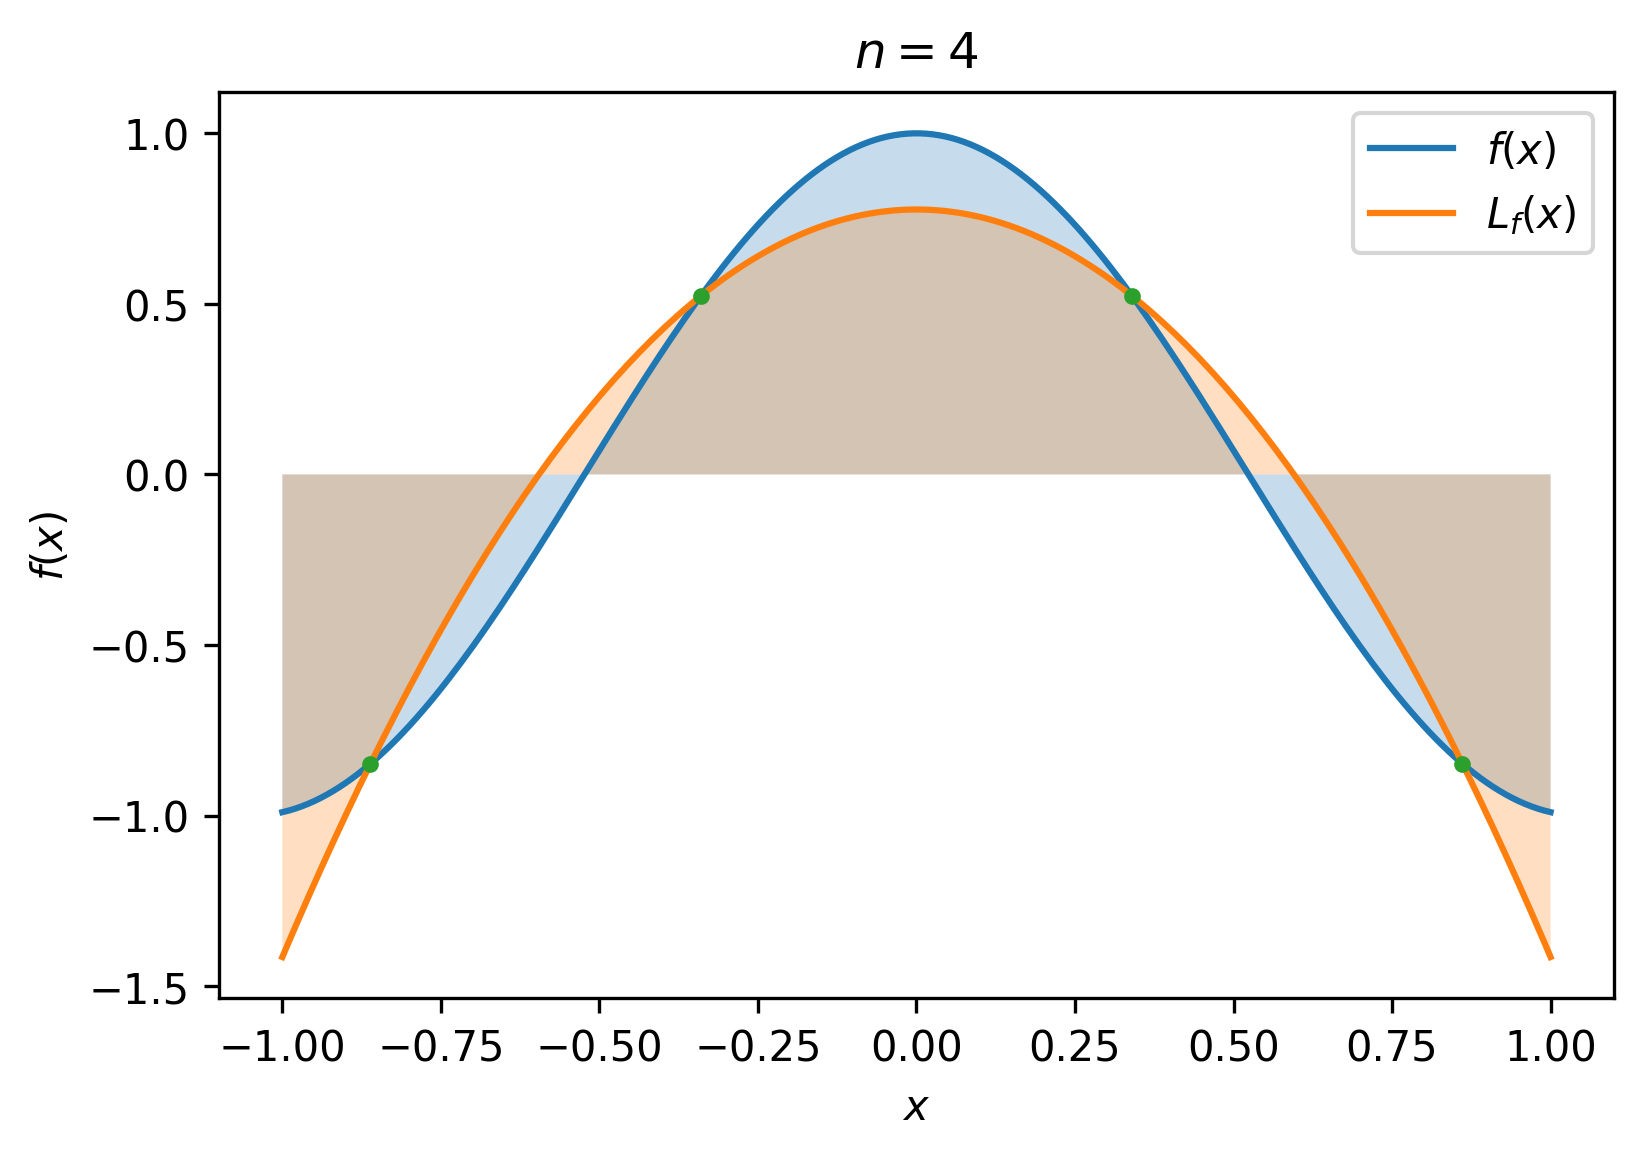

In [5]:
# The function we will integrate
f = lambda x: np.cos(x * 3)

n = 4
# Get the roots of the n - 1 degree polynomial with w[x] = 1 in [-1, 1] (Legendre, NOT Lagrange)
# Technically, we need the Legendre polynomials with w[x] = 1/2 (these integrate to 1 on [-1,1]) to insure that
# the polynomials are orthonormal and not just orthogonal. However, the roots of the non-normalized Legendre
# polys will be the same as the roots of the normalized ones, so we're okay here
Xs, ws = scipy.special.roots_legendre(n-1)
# Get the roots of the n degree polynomial
X, w = scipy.special.roots_legendre(n)

# Get the Lagrange interpolating polynomial
Lf = scipy.interpolate.lagrange(X, f(X))

# Visualize the actual function and the Legendre interpolating polynomial
fig, ax = plt.subplots()
x = np.linspace(-1, 1, 200)

ax.plot(x, f(x))
ax.fill_between(x, np.zeros(x.shape), f(x), alpha=0.25)
ax.plot(x, Lf(x))
ax.fill_between(x, np.zeros(x.shape), Lf(x), alpha=0.25)
ax.plot(X, f(X), '.')
ax.set_xlabel('$x$')
ax.set_title('$n=%d$' % n)
ax.set_ylabel('$f(x)$')
plt.legend(['$f(x)$', '$L_f(x)$'], loc='best');

### Examples of Orthogonal Polynomials: The Standard Normal and the Hermite Polynomials

Let $X\sim\mathcal{N}(0,1)$. The orthogonal polynomials in this case are known as the [Hermite polynomials](https://en.wikipedia.org/wiki/Hermite_polynomials).
They are known analytically.
The first few are:
$$
\begin{array}{ccc}
\phi_1(x) &=& 1,\\
\phi_2(x) &=& x,\\
\phi_3(x) &=& x^2 - 1,\\
\phi_4(x) &=& x^3 - 3x,\\
\phi_5(x) &=& x^4 - 6x^2 + 3.
\end{array}
$$

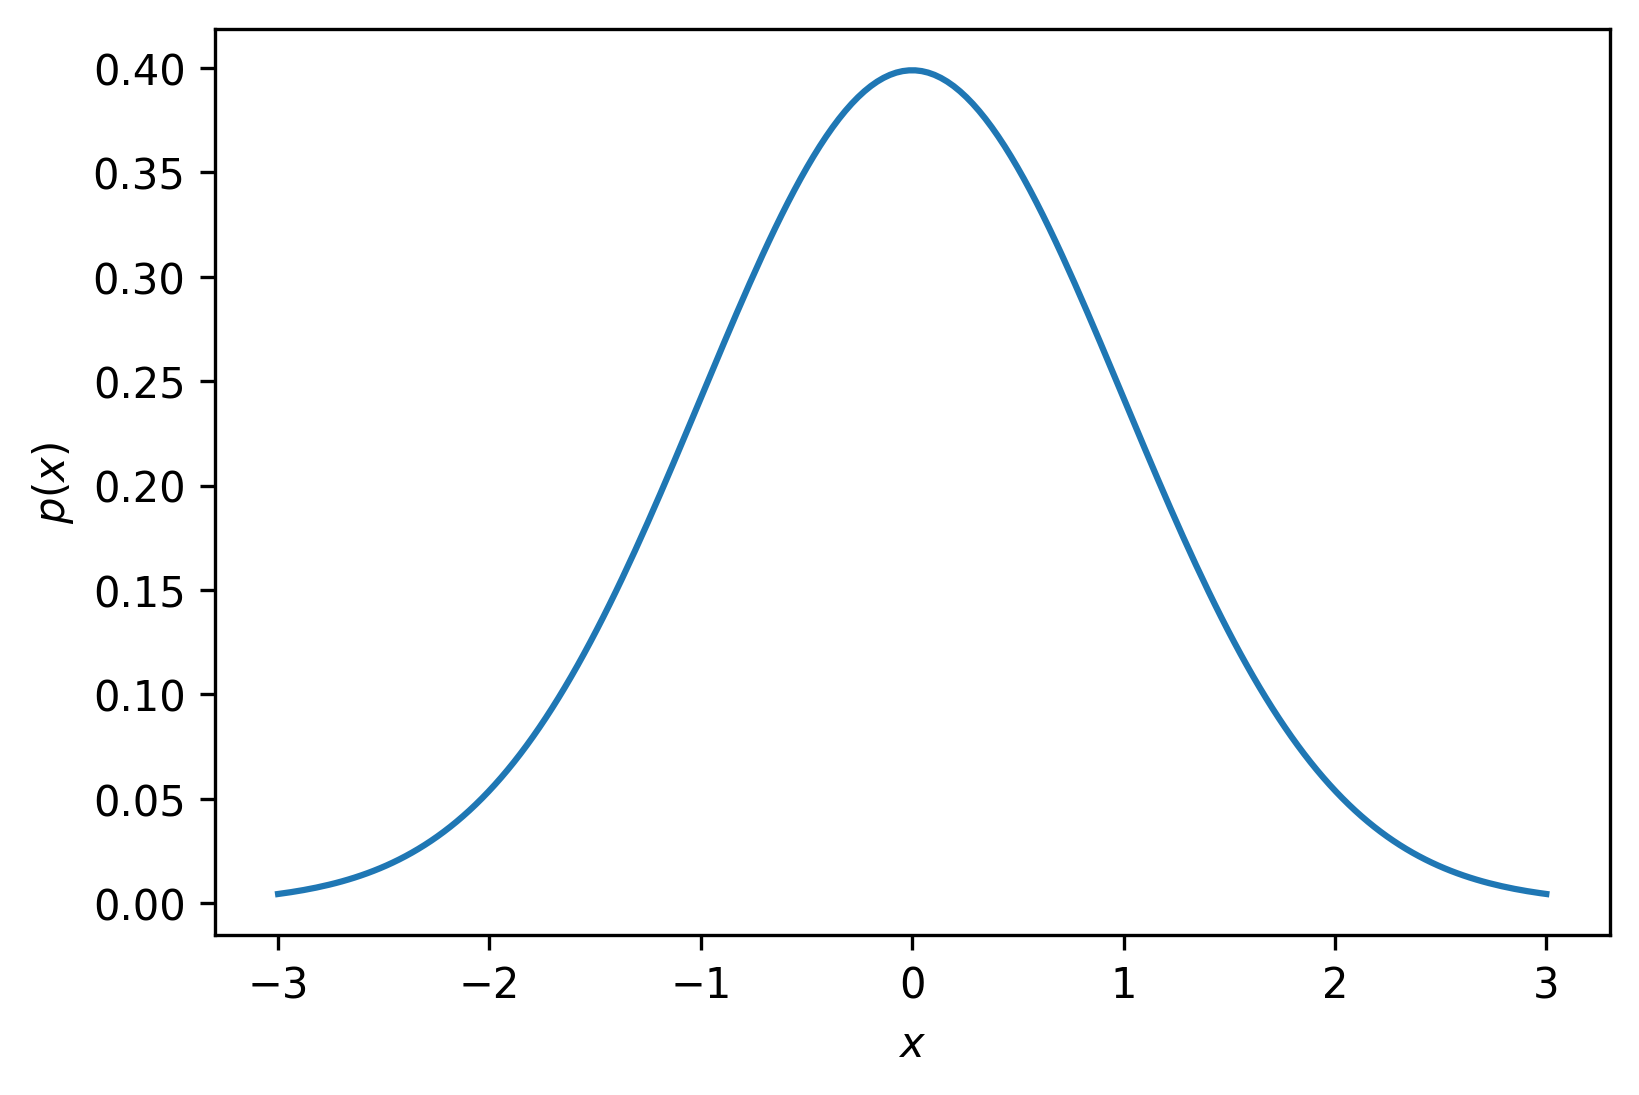

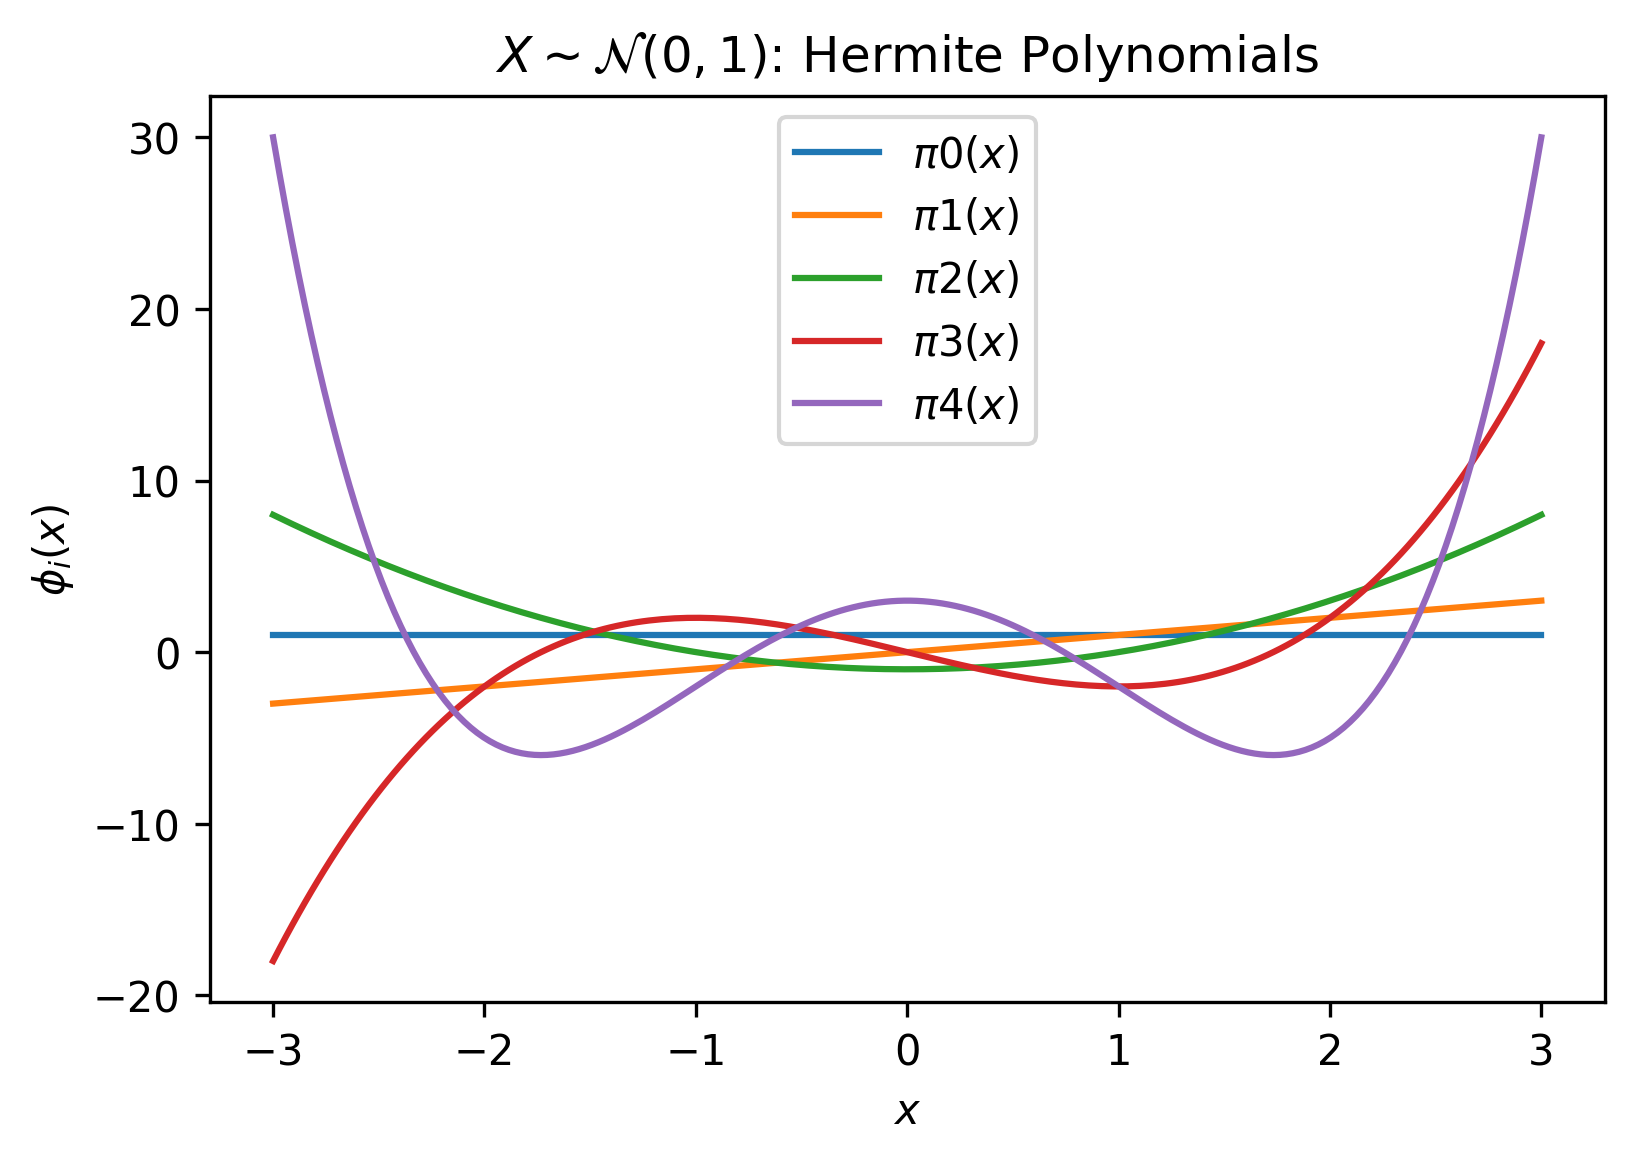

In [6]:
# The random variable you wish to consider
X = st.norm()
# The maximum polynomial degree you want
degree = 5

# Plot the probability density
fig, ax = plt.subplots()
x = np.linspace(-3, 3, 200)
ax.plot(x, X.pdf(x))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

# Plot them
fig, ax = plt.subplots()
# Evaluate the orhtogonal polynomials on all these x's

# Plot each one of them
for i in range(degree):
    # Construct the orthogonal polynomials
    phi = np.polynomial.hermite_e.HermiteE.basis(i)
    phi_x = phi(x)
    ax.plot(x, phi_x);
    ax.set_xlabel('$x$')
    ax.set_ylabel('$\phi_i(x)$')
    ax.set_title('$X\sim\mathcal{N}(0,1)$: Hermite Polynomials')
    plt.legend(['$\pi{%d}(x)$' % i for i in range(0, degree + 1)], loc='best');